In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set(font_scale=1.2)
import pdb

colors = {'SMiRL (ours)': 'k',
          'SMiRL VAE (ours)': 'purple',
          'ICM': 'b',
          'RND': 'orange',
          'Oracle': 'g',
          'Reward + SMiRL (ours)' : 'k',
          'Reward + SMiRL (no-expert)' : 'k',
          'Reward + ICM' : 'b',
          'Reward': 'r',
          'SMiRL + ICM': 'brown',
         }
linestyle = {'SMiRL (ours)': '-',
          'ICM': '-',
          'RND': '--',
          'Oracle': '--',
          'SMiRL VAE (ours)': '--',
          'Reward + SMiRL (ours)' : '-',
          'Reward + SMiRL (no-expert)' : '-.',
          'Reward + ICM' : '-',
          'Reward': '--',
          'SMiRL + ICM': '-',
         }
def plotsns_smoothed(ax, s, df, label, title=None, ylabel=None, res=1):
    data = list(df[s])
    s = s.split('/')[-1]
    data = pd.DataFrame([(i//res*res, data[i]) for i in range(len(data))])
    data = data.rename(columns={1: s, 0: 'Episodes'})
    ax = sns.lineplot(x='Episodes', y=s, data=data, label=label, ax=ax, legend=False,  c=colors[label])

    if title is not None:
        ax.set_title(title)
    else:
        ax.set_title(s)

    if ylabel is not None:
        ax.set_ylabel(ylabel)

def plotsns(ax, s, df, label, title=None, ylabel=None, res=1):
    data = list(df[s])
    data = (np.cumsum(data)[res:]-np.cumsum(data)[:-res]) / res
    s = s.split('/')[-1]
    data = pd.DataFrame([(i, data[i]) for i in range(len(data))])
    data = data.rename(columns={1: s, 0: 'Episodes'})
    ax = sns.lineplot(x='Episodes', y=s, data=data, label=label, ax=ax, legend=False, c=colors[label])
    #print(ax.lines)
    ax.lines[-1].set_linestyle(linestyle[label])
    #print("label", label,linestyle[label] )
    if title is not None:
        ax.set_title(title)
    else:
        ax.set_title(s)

    if ylabel is not None:
        ax.set_ylabel(ylabel)
        
    ax.ticklabel_format(axis= 'x', style='sci', scilimits=(0,3))
    #ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
def save(fname):
    plt.show()
    '''
    plt.savefig('{}.png'.format(fname))
    plt.clf()
    '''
    

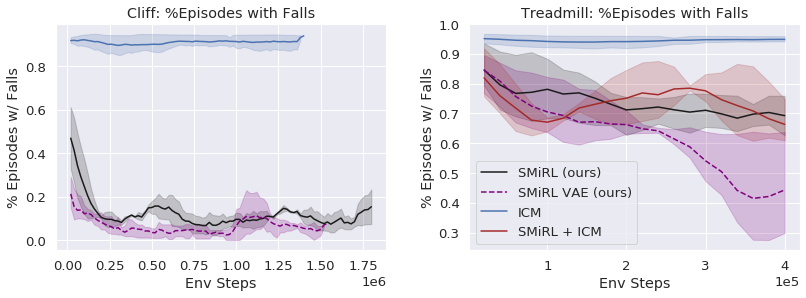

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20/3.*2,5))

#*******************************************************************************
#####################
####### Cliff #######
#####################
#*******************************************************************************

datadir = './cliff.csv'
df = pd.read_csv(datadir)
ax1.set_title('Cliff: %Episodes with Falls')

#####################
#### Biped Falls ####
#####################

biped_falls = []
res = 10

bf = list(df.iloc[1][1:])[:100]
bf = 1 - np.array([float(x) for x in bf])
bf = (np.cumsum(bf)[res:] - np.cumsum(bf)[:-res])/res
time = 20000
for val in bf:
    biped_falls.append((time, float(val)))
    time += 20000

bf = list(df.iloc[2][1:])[:100]
bf = 1 - np.array([float(x) for x in bf])
bf = (np.cumsum(bf)[res:] - np.cumsum(bf)[:-res])/res
time = 20000
for val in bf:
    biped_falls.append((time, float(val)))
    time += 20000

bf = pd.DataFrame(biped_falls)
bf = bf.rename(columns={1: 'Biped Falls', 0: 'Steps'})
label='SMiRL (ours)'
sns.lineplot(data=bf, x='Steps', y='Biped Falls', ax=ax1, label='SMiRL (ours)', legend=False, c=colors[label])
ax1.lines[-1].set_linestyle(linestyle[label])
#####################
######## VAE ########
#####################

biped_falls = []

bf = list(df.iloc[5][1:])[:100]
bf = 1 - np.array([float(x) for x in bf])
bf = (np.cumsum(bf)[res:] - np.cumsum(bf)[:-res])/res
time = 20000
for val in bf:
    biped_falls.append((time, float(val)))
    time += 20000

bf = list(df.iloc[6][1:])[:100]
bf = 1 - np.array([float(x) for x in bf])
bf = (np.cumsum(bf)[res:] - np.cumsum(bf)[:-res])/res
time = 20000
for val in bf:
    biped_falls.append((time, float(val)))
    time += 20000

bf = list(df.iloc[7][1:])[:100]
bf = 1 - np.array([float(x) for x in bf])
bf = (np.cumsum(bf)[res:] - np.cumsum(bf)[:-res])/res
time = 20000
for val in bf:
    biped_falls.append((time, float(val)))
    time += 20000

bf = pd.DataFrame(biped_falls)
bf = bf.rename(columns={1: 'Biped Falls VAE', 0: 'Steps'})
label='SMiRL VAE (ours)'
sns.lineplot(data=bf, x='Steps', y='Biped Falls VAE', ax=ax1, label='SMiRL VAE (ours)', legend=False, c=colors[label])
ax1.lines[-1].set_linestyle(linestyle[label])

#####################
######## ICM ########
#####################

biped_falls = []

bf = list(df.iloc[10][1:])
bf = 1 - np.array([float(x) for x in bf])
bf = (np.cumsum(bf)[res:] - np.cumsum(bf)[:-res])/res
time = 20000
for val in bf:
    biped_falls.append((time, float(val)))
    time += 20000

bf = list(df.iloc[11][1:])
bf = 1 - np.array([float(x) for x in bf])
bf = (np.cumsum(bf)[res:] - np.cumsum(bf)[:-res])/res
time = 20000
for val in bf:
    biped_falls.append((time, float(val)))
    time += 20000

bf = list(df.iloc[12][1:])
bf = 1 - np.array([float(x) for x in bf])
bf = (np.cumsum(bf)[res:] - np.cumsum(bf)[:-res])/res
time = 20000
for val in bf:
    biped_falls.append((time, float(val)))
    time += 20000

bf = pd.DataFrame(biped_falls)
bf = bf.rename(columns={1: 'Biped Falls ICM', 0: 'Steps'})
label='ICM'
sns.lineplot(data=bf, x='Steps', y='Biped Falls ICM', ax=ax1, label='ICM', legend=False,  c=colors[label])
ax1.lines[-1].set_linestyle(linestyle[label])

#*******************************************************************************
#####################
##### Treadmill #####
#####################
#*******************************************************************************

datadir = './treadmill.csv'
df = pd.read_csv(datadir)
ax2.set_title('Treadmill: %Episodes with Falls')

#####################
#### Biped Falls ####
#####################

biped_falls = []
res = 5

bf = list(df.iloc[1][1:])[:25]
bf = 1 - np.array([float(x) for x in bf])
bf = (np.cumsum(bf)[res:] - np.cumsum(bf)[:-res])/res
time = 20000
for val in bf:
    biped_falls.append((time, float(val)))
    time += 20000

bf = list(df.iloc[2][1:])[:25]
bf = 1 - np.array([float(x) for x in bf])
bf = (np.cumsum(bf)[res:] - np.cumsum(bf)[:-res])/res
time = 20000
for val in bf:
    biped_falls.append((time, float(val)))
    time += 20000

bf = list(df.iloc[3][1:])[:25]
bf = 1 - np.array([float(x) for x in bf])
bf = (np.cumsum(bf)[res:] - np.cumsum(bf)[:-res])/res
time = 20000
for val in bf:
    biped_falls.append((time, float(val)))
    time += 20000

bf = pd.DataFrame(biped_falls)
bf = bf.rename(columns={1: 'Biped Falls', 0: 'Steps'})
label='SMiRL (ours)'
sns.lineplot(data=bf, x='Steps', y='Biped Falls', ax=ax2, label='SMiRL (ours)',c=colors[label])
ax2.lines[-1].set_linestyle(linestyle[label])

#####################
######## VAE ########
#####################

biped_falls = []
res = 5

bf = list(df.iloc[6][1:])[:25]
bf = 1 - np.array([float(x) for x in bf])
bf = (np.cumsum(bf)[res:] - np.cumsum(bf)[:-res])/res
time = 20000
for val in bf:
    biped_falls.append((time, float(val)))
    time += 20000

bf = list(df.iloc[7][1:])[:25]
bf = 1 - np.array([float(x) for x in bf])
bf = (np.cumsum(bf)[res:] - np.cumsum(bf)[:-res])/res
time = 20000
for val in bf:
    biped_falls.append((time, float(val)))
    time += 20000

bf = list(df.iloc[8][1:])[:25]
bf = 1 - np.array([float(x) for x in bf])
bf = (np.cumsum(bf)[res:] - np.cumsum(bf)[:-res])/res
time = 20000
for val in bf:
    biped_falls.append((time, float(val)))
    time += 20000

bf = pd.DataFrame(biped_falls)
bf = bf.rename(columns={1: 'Biped Falls VAE', 0: 'Steps'})
label='SMiRL VAE (ours)'
sns.lineplot(data=bf, x='Steps', y='Biped Falls VAE', ax=ax2, label='SMiRL VAE (ours)',c=colors[label])
ax2.lines[-1].set_linestyle(linestyle[label])


#####################
######## ICM ########
#####################

biped_falls = []
res = 5

bf = list(df.iloc[21][1:])[:25]
bf = 1 - np.array([float(x) for x in bf])
bf = (np.cumsum(bf)[res:] - np.cumsum(bf)[:-res])/res
time = 20000
for val in bf:
    biped_falls.append((time, float(val)))
    time += 20000

bf = list(df.iloc[22][1:])[:25]
bf = 1 - np.array([float(x) for x in bf])
bf = (np.cumsum(bf)[res:] - np.cumsum(bf)[:-res])/res
time = 20000
for val in bf:
    biped_falls.append((time, float(val)))
    time += 20000

bf = list(df.iloc[23][1:])[:25]
bf = 1 - np.array([float(x) for x in bf])
bf = (np.cumsum(bf)[res:] - np.cumsum(bf)[:-res])/res
time = 20000
for val in bf:
    biped_falls.append((time, float(val)))
    time += 20000

bf = pd.DataFrame(biped_falls)
bf = bf.rename(columns={1: 'Biped Falls ICM', 0: 'Steps'})
label='ICM'
sns.lineplot(data=bf, x='Steps', y='Biped Falls ICM', ax=ax2, label='ICM', c=colors[label])
ax2.lines[-1].set_linestyle(linestyle[label])



#####################
######## SMiRL + ICM ########
#####################

biped_falls = []
res = 5

bf = list(df.iloc[26][1:])[:25]
bf = 1 - np.array([float(x) for x in bf])
bf = (np.cumsum(bf)[res:] - np.cumsum(bf)[:-res])/res
time = 20000
for val in bf:
    biped_falls.append((time, float(val)))
    time += 20000

bf = list(df.iloc[27][1:])[:25]
bf = 1 - np.array([float(x) for x in bf])
bf = (np.cumsum(bf)[res:] - np.cumsum(bf)[:-res])/res
time = 20000
for val in bf:
    biped_falls.append((time, float(val)))
    time += 20000
    
bf = list(df.iloc[29][1:])[:25]
bf = 1 - np.array([float(x) for x in bf])
bf = (np.cumsum(bf)[res:] - np.cumsum(bf)[:-res])/res
time = 20000
for val in bf:
    biped_falls.append((time, float(val)))
    time += 20000

bf = pd.DataFrame(biped_falls)
bf = bf.rename(columns={1: 'Biped Falls SMiRL + ICM', 0: 'Steps'})
label='SMiRL + ICM'
sns.lineplot(data=bf, x='Steps', y='Biped Falls SMiRL + ICM', ax=ax2, label='SMiRL + ICM', c=colors[label])
ax2.lines[-1].set_linestyle(linestyle[label])

#*******************************************************************************
#####################
##### Stability #####
#####################
#*******************************************************************************

# datadir = './safe.csv'
# df = pd.read_csv(datadir)
# ax3.set_title('Stability Reward for Walking')

# #####################
# ##### w/ SMiRL ######
# #####################

# biped_falls = []
# res = 5

# bf = list(df.iloc[15][1:])
# bf = 1 - np.array([float(x) for x in bf])
# bf = (np.cumsum(bf)[res:] - np.cumsum(bf)[:-res])/res
# time = 20000
# for val in bf:
#     biped_falls.append((time, float(val)))
#     time += 20000

# bf = list(df.iloc[16][1:])
# bf = 1 - np.array([float(x) for x in bf])
# bf = (np.cumsum(bf)[res:] - np.cumsum(bf)[:-res])/res
# time = 20000
# for val in bf:
#     biped_falls.append((time, float(val)))
#     time += 20000

# bf = pd.DataFrame(biped_falls)
# bf = bf.rename(columns={1: 'Biped Falls', 0: 'Steps'})
# label='Reward + SMiRL (ours)'
# sns.lineplot(data=bf, x='Steps', y='Biped Falls', ax=ax3, label='Reward + SMiRL (ours)', c=colors[label])
# ax3.lines[-1].set_linestyle(linestyle[label])

# #####################
# ###### Vanilla ######
# #####################

# biped_falls = []
# res = 5

# bf = list(df.iloc[11][1:])
# bf = 1 - np.array([float(x) for x in bf])
# bf = (np.cumsum(bf)[res:] - np.cumsum(bf)[:-res])/res
# time = 20000
# for val in bf:
#     biped_falls.append((time, float(val)))
#     time += 20000

# bf = list(df.iloc[12][1:])
# bf = 1 - np.array([float(x) for x in bf])
# bf = (np.cumsum(bf)[res:] - np.cumsum(bf)[:-res])/res
# time = 20000
# for val in bf:
#     biped_falls.append((time, float(val)))
#     time += 20000

# bf = pd.DataFrame(biped_falls)
# bf = bf.rename(columns={1: 'Biped Falls', 0: 'Steps'})

# # Move colors (true reward should be 5)
# # sns.lineplot(data=[], x=None, y=None, ax=ax3)
# # sns.lineplot(data=[], x=None, y=None, ax=ax3)
# # sns.lineplot(data=[], x=None, y=None, ax=ax3)
# label='Reward'
# sns.lineplot(data=bf, x='Steps', y='Biped Falls', ax=ax3, label='Reward', ci=0, c=colors[label])
# ax3.lines[-1].set_linestyle(linestyle[label])
ax1.ticklabel_format(axis= 'x', style='sci', scilimits=(0,3))
ax2.ticklabel_format(axis= 'x', style='sci', scilimits=(0,3))
#ax3.ticklabel_format(axis= 'x', style='sci', scilimits=(0,3))

ax1.set(ylabel='% Episodes w/ Falls')
ax2.set(ylabel='% Episodes w/ Falls')
#ax3.set(ylabel='% Episodes w/ Falls')
ax1.set(xlabel='Env Steps')
ax2.set(xlabel='Env Steps')
# ax3.set(xlabel='Env Steps')
# ax3.legend()
'''
handles, labels = ax2.get_legend_handles_labels()
plt.figlegend(handles, labels, ncol=5, mode='expand', bbox_to_anchor=(.37,.03,.3,.1))
'''
plt.subplots_adjust(bottom=.25, wspace=.25)
plt.show()


#### 

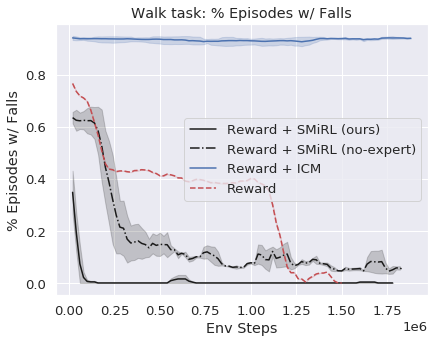

In [7]:
fig, (ax3) = plt.subplots(1, 1, figsize=(20/3.,5))
#*******************************************************************************
#####################
##### Stability #####
#####################
#*******************************************************************************

datadir = './safe.csv'
df = pd.read_csv(datadir)
ax3.set_title('Walk task: % Episodes w/ Falls')

#####################
##### w/ SMiRL ######
#####################

biped_falls = []
res = 5
bf = list(df.iloc[15][1:])
bf = 1 - np.array([float(x) for x in bf])
bf = (np.cumsum(bf)[res:] - np.cumsum(bf)[:-res])/res
time = 20000
for val in bf:
    biped_falls.append((time, float(val)))
    time += 20000

bf = list(df.iloc[16][1:])
bf = 1 - np.array([float(x) for x in bf])
bf = (np.cumsum(bf)[res:] - np.cumsum(bf)[:-res])/res
time = 20000
for val in bf:
    biped_falls.append((time, float(val)))
    time += 20000

bf = pd.DataFrame(biped_falls)
bf = bf.rename(columns={1: 'Biped Falls', 0: 'Steps'})
label='Reward + SMiRL (ours)'
sns.lineplot(data=bf, x='Steps', y='Biped Falls', ax=ax3, label='Reward + SMiRL (ours)', c=colors[label])
ax3.lines[-1].set_linestyle(linestyle[label])


#####################
##### w/ SMiRL no expert data ######
#####################

biped_falls = []
res = 5
bf = list(df.iloc[46][1:])
bf = 1 - np.array([float(x) for x in bf])
bf = (np.cumsum(bf)[res:] - np.cumsum(bf)[:-res])/res
time = 20000
for val in bf:
    biped_falls.append((time, float(val)))
    time += 20000

bf = list(df.iloc[47][1:])
bf = 1 - np.array([float(x) for x in bf])
bf = (np.cumsum(bf)[res:] - np.cumsum(bf)[:-res])/res
time = 20000
for val in bf:
    biped_falls.append((time, float(val)))
    time += 20000
    
bf = list(df.iloc[48][1:])
bf = 1 - np.array([float(x) for x in bf])
bf = (np.cumsum(bf)[res:] - np.cumsum(bf)[:-res])/res
time = 20000
for val in bf:
    biped_falls.append((time, float(val)))
    time += 20000

bf = pd.DataFrame(biped_falls)
bf = bf.rename(columns={1: 'Biped Falls', 0: 'Steps'})
label='Reward + SMiRL (no-expert)'
sns.lineplot(data=bf, x='Steps', y='Biped Falls', ax=ax3, label='Reward + SMiRL (no-expert)', c=colors[label])
ax3.lines[-1].set_linestyle(linestyle[label])


# #####################
# ##### w/ ICM ######
# #####################

biped_falls = []
res = 5

bf = list(df.iloc[20][1:])
bf = 1 - np.array([float(x) for x in bf])
bf = (np.cumsum(bf)[res:] - np.cumsum(bf)[:-res])/res
time = 20000
for val in bf:
    biped_falls.append((time, float(val)))
    time += 20000

bf = list(df.iloc[21][1:])
bf = 1 - np.array([float(x) for x in bf])
bf = (np.cumsum(bf)[res:] - np.cumsum(bf)[:-res])/res
time = 20000
for val in bf:
    biped_falls.append((time, float(val)))
    time += 20000
    
bf = list(df.iloc[22][1:])
bf = 1 - np.array([float(x) for x in bf])
bf = (np.cumsum(bf)[res:] - np.cumsum(bf)[:-res])/res
time = 20000
for val in bf:
    biped_falls.append((time, float(val)))
    time += 20000

bf = pd.DataFrame(biped_falls)
bf = bf.rename(columns={1: 'Biped Falls', 0: 'Steps'})
label='Reward + ICM'
sns.lineplot(data=bf, x='Steps', y='Biped Falls', ax=ax3, label='Reward + ICM', c=colors[label])
ax3.lines[-1].set_linestyle(linestyle[label])

#####################
###### Vanilla ######
#####################

biped_falls = []
res = 5

bf = list(df.iloc[11][1:])
bf = 1 - np.array([float(x) for x in bf])
bf = (np.cumsum(bf)[res:] - np.cumsum(bf)[:-res])/res
time = 20000
for val in bf:
    biped_falls.append((time, float(val)))
    time += 20000

bf = list(df.iloc[12][1:])
bf = 1 - np.array([float(x) for x in bf])
bf = (np.cumsum(bf)[res:] - np.cumsum(bf)[:-res])/res
time = 20000
for val in bf:
    biped_falls.append((time, float(val)))
    time += 20000

bf = pd.DataFrame(biped_falls)
bf = bf.rename(columns={1: 'Biped Falls', 0: 'Steps'})

# Move colors (true reward should be 5)
# sns.lineplot(data=[], x=None, y=None, ax=ax3)
# sns.lineplot(data=[], x=None, y=None, ax=ax3)
# sns.lineplot(data=[], x=None, y=None, ax=ax3)
label='Reward'
sns.lineplot(data=bf, x='Steps', y='Biped Falls', ax=ax3, label='Reward', ci=0.,c=colors[label])
ax3.lines[-1].set_linestyle(linestyle[label])

ax3.ticklabel_format(axis= 'x', style='sci', scilimits=(0,3))


ax3.set(ylabel='% Episodes w/ Falls')
ax3.set(xlabel='Env Steps')
ax3.legend()
'''
handles, labels = ax2.get_legend_handles_labels()
plt.figlegend(handles, labels, ncol=5, mode='expand', bbox_to_anchor=(.37,.03,.3,.1))
'''
#plt.subplots_adjust(bottom=.25, wspace=.25)
plt.show()

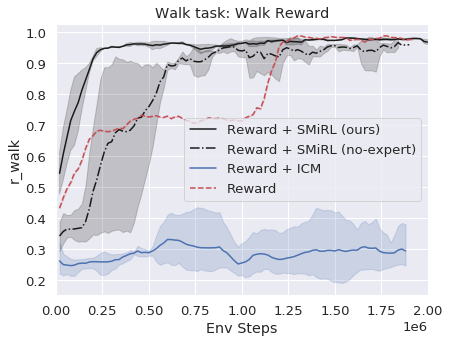

In [9]:
fig, (ax3) = plt.subplots(1, 1, figsize=(20/3.,5))
#*******************************************************************************
#####################
##### Stability #####
#####################
#*******************************************************************************

datadir = './safe.csv'
df = pd.read_csv(datadir)
ax3.set_title('Walk task: Walk Reward')

#####################
##### w/ SMiRL ######
#####################

biped_falls = []
res = 5

bf = list(df.iloc[25][1:])
bf =  np.array([float(x) for x in bf])
bf = (np.cumsum(bf)[res:] - np.cumsum(bf)[:-res])/res
time = 20000
for val in bf:
    biped_falls.append((time, float(val)))
    time += 20000

bf = list(df.iloc[26][1:])
bf = np.array([float(x) for x in bf])
bf = (np.cumsum(bf)[res:] - np.cumsum(bf)[:-res])/res
time = 20000
for val in bf:
    biped_falls.append((time, float(val)))
    time += 20000

bf = list(df.iloc[27][1:])
bf = np.array([float(x) for x in bf])
bf = (np.cumsum(bf)[res:] - np.cumsum(bf)[:-res])/res
time = 20000
for val in bf:
    biped_falls.append((time, float(val)))
    time += 20000
    
bf = pd.DataFrame(biped_falls)
bf = bf.rename(columns={1: 'Biped Reward + SMiRL', 0: 'Steps'})
label='Reward + SMiRL (ours)'
sns.lineplot(data=bf, x='Steps', y='Biped Reward + SMiRL', ax=ax3, label='Reward + SMiRL (ours)', c=colors[label])
ax3.lines[-1].set_linestyle(linestyle[label])


#####################
##### w/ SMiRL no expert data ######
#####################

biped_falls = []
res = 5

bf = list(df.iloc[47][1:])
bf =  np.array([float(x) for x in bf])
bf = (np.cumsum(bf)[res:] - np.cumsum(bf)[:-res])/res
time = 20000
for val in bf:
    biped_falls.append((time, float(val)))
    time += 20000

bf = list(df.iloc[48][1:])
bf = np.array([float(x) for x in bf])
bf = (np.cumsum(bf)[res:] - np.cumsum(bf)[:-res])/res
time = 20000
for val in bf:
    biped_falls.append((time, float(val)))
    time += 20000

bf = list(df.iloc[49][1:])
bf = np.array([float(x) for x in bf])
bf = (np.cumsum(bf)[res:] - np.cumsum(bf)[:-res])/res
time = 20000
for val in bf:
    biped_falls.append((time, float(val)))
    time += 20000
    
bf = pd.DataFrame(biped_falls)
bf = bf.rename(columns={1: 'Biped Reward + SMiRL', 0: 'Steps'})
label='Reward + SMiRL (no-expert)'
sns.lineplot(data=bf, x='Steps', y='Biped Reward + SMiRL', ax=ax3, label='Reward + SMiRL (no-expert)', c=colors[label])
ax3.lines[-1].set_linestyle(linestyle[label])

#####################
##### w/ ICM ######
#####################

biped_falls = []
res = 5

bf = list(df.iloc[37][1:])
bf =  np.array([float(x) for x in bf])
bf = (np.cumsum(bf)[res:] - np.cumsum(bf)[:-res])/res
time = 20000
for val in bf:
    biped_falls.append((time, float(val)))
    time += 20000

bf = list(df.iloc[38][1:])
bf = np.array([float(x) for x in bf])
bf = (np.cumsum(bf)[res:] - np.cumsum(bf)[:-res])/res
time = 20000
for val in bf:
    biped_falls.append((time, float(val)))
    time += 20000

bf = list(df.iloc[39][1:])
bf = np.array([float(x) for x in bf])
bf = (np.cumsum(bf)[res:] - np.cumsum(bf)[:-res])/res
time = 20000
for val in bf:
    biped_falls.append((time, float(val)))
    time += 20000
    
bf = pd.DataFrame(biped_falls)
bf = bf.rename(columns={1: 'Biped Reward + ICM', 0: 'Steps'})
label='Reward + ICM'
sns.lineplot(data=bf, x='Steps', y='Biped Reward + ICM', ax=ax3, label='Reward + ICM', c=colors[label])
ax3.lines[-1].set_linestyle(linestyle[label])


#####################
###### Vanilla ######
#####################

biped_falls = []
res = 5

bf = list(df.iloc[29][1:])
bf = np.array([float(x) for x in bf])
bf = (np.cumsum(bf)[res:] - np.cumsum(bf)[:-res])/res
time = 20000
for val in bf:
    biped_falls.append((time, float(val)))
    time += 20000

bf = list(df.iloc[30][1:])
bf =  np.array([float(x) for x in bf])
bf = (np.cumsum(bf)[res:] - np.cumsum(bf)[:-res])/res
time = 20000
for val in bf:
    biped_falls.append((time, float(val)))
    time += 20000
bf = list(df.iloc[31][1:])
bf =  np.array([float(x) for x in bf])
bf = (np.cumsum(bf)[res:] - np.cumsum(bf)[:-res])/res
time = 20000
for val in bf:
    biped_falls.append((time, float(val)))
    time += 20000

bf = pd.DataFrame(biped_falls)
bf = bf.rename(columns={1: 'Biped Reward', 0: 'Steps'})

# Move colors (true reward should be 5)
# sns.lineplot(data=[], x=None, y=None, ax=ax3)
# sns.lineplot(data=[], x=None, y=None, ax=ax3)
# sns.lineplot(data=[], x=None, y=None, ax=ax3)
label='Reward'
sns.lineplot(data=bf, x='Steps', y='Biped Reward', ax=ax3, label='Reward',ci=0., c=colors[label])
ax3.lines[-1].set_linestyle(linestyle[label])

ax3.ticklabel_format(axis= 'x', style='sci', scilimits=(0,3))
ax3.set_xlim(0, 2e6)

ax3.set(ylabel='r_walk')
ax3.set(xlabel='Env Steps')
ax3.legend()
'''
handles, labels = ax2.get_legend_handles_labels()
plt.figlegend(handles, labels, ncol=5, mode='expand', bbox_to_anchor=(.37,.03,.3,.1))
'''
#plt.subplots_adjust(bottom=.25, wspace=.25)
plt.show()

In [1]:
bf

NameError: name 'bf' is not defined